START NOTEBOOK

## Set-up 

In [1]:
from hydroplots import *
from leach_hydrology import *
import numpy as np

import mpld3
# mpld3.enable_notebook()

# Plot graphs within this document
%matplotlib inline

# Plot graphs outside (for interaction)
# %matplotlib

from pestmob import *
from mixinglayer import *

### Pesticide, soil type and runoff calibration parameter.  

In [2]:
# Soil and pesticide
pesticide = 'S-metolachlor'
soil_type = 'Vine Soil'
soil = 'Rouff'
soil_short = 'Vine'

pesti_obs = choose_pesticide(
    pesticide,
    soil)

# Kd ranges to test
Kd_pest_sterile = pesti_obs[0]
Kd_pest_living = pesti_obs[1]

# Initial concentrations and mass out observed
pest_dict_S_1st = pesti_obs[2]
pest_dict_L_1st = pesti_obs[3]
pest_dict_S_2nd = pesti_obs[4]
pest_dict_L_2nd = pesti_obs[5]

# Assumed (used to calculate Reynolds number)
runoff_vel = 10.0  # mm/min

### Microcosm

In [3]:
d = (14.93 * 2)  # Diameter of falcon tube (mm)
area = ((d / 2) ** 2) * 3.1416  # (mm2)
soil_height1 = 18  # Mixing layer depth in mm
soil_height2 = 18  # mm

### Soil hydrological characteristics

In [4]:
if soil == 'Alteck':
    kSat = 2.24  # mm/min (13.45 cm/h - Crop Soil) 
    psi = 1100  # soil suction Alteck (mm)
elif soil == 'Rouff': 
    kSat = 17.62*10/60  # mm/min (17.62 cm/h - Vine Soil) 
    psi = 1100  # soil suction Alteck (mm)
    
# Soil characteristics (Equivalent for Alteck and Rouffach)
# Initial bulk density options:
pb_i0 = 0.99/10**3  # bulk density (g/cm^3) -> g/mm^3  (M. Trautmann)
pb_i1 = 2.61/10**3 # inital 1st pulse, calc. from experiment cond.
pb_i2 = 3.59/10**3 # initial 2nd pulse, calc. from experiment cond.

# Final bulk density options (1st and 2nd pulses)
pb_f1 = 3.59/10**3 # final1, calculated from experimental conditions.
pb_f2 = 3.76/10**3 # final2, calculated from experimental conditions.

### Store results

In [5]:
output_hydro_params = {
    soil_short : [{'R1_FA':[],
              'R2_ALL':[],
              'Err1':[{'Fresh':[], 'Aged':[]}],
              'Err2':[{'SF':[], 'SA':[], 'LF':[], 'LA':[]}],
              'Ksat2':[{'SF':[], 'SA':[], 'LF':[], 'LA':[]}]
             }]
    }

In [6]:
output_pesti_params = {
    soil_short: {'R1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'R2': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Err1': {'SF': [], 'SA': [], 'LF': [], 'LA': []},
                 'Err2': {'SF': [], 'SA': [], 'LF': [], 'LA': []},
                 'Koc1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'Koc2': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'logKd1': {'SF': None, 'SA': None, 'LF': None, 'LA': None},
                 'logKd2': {'SF': None, 'SA': None, 'LF': None, 'LA': None}
                 }
}

## Hydrology - 1st pulse

#### Computation

In [7]:
water_data = leachsim(kSat = kSat,
                      soil_height=soil_height1,
                      soil = 'Alteck',
                      psi=psi)

Mass balance True
Mass balance 0.0
Mass balance 0.0


In [8]:
water_eval = leachsim2(
    kSat = [kSat],
    soil_height=soil_height1,
    soil = 'Alteck',
    isAGED = False,
    isFirstCycle=True 
)

output_hydro_params = extract_goodness(
    water_eval,
    output_hydro_params,
    soil_short,
    isFirstCycle = True,
    isAGED = False)


FRESH
--------------------------------------------
ksat high:  17.62 cm/h
ksat med12:  17.62 cm/h
ksat med30:  17.62 cm/h
ksat low:  17.62 cm/h
--------------------------------------------
R2:  0.979293137692
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -1.6576800421
55 mm/h - 12min  29.7621075344
55 mm/h - 30min  0.193397570593
30 mm/h - 30min  -4.44276801315
--------------------------------------------
Mass balance:  True True True True


In [9]:
water_eval = leachsim2(
    kSat = [kSat],
    soil_height=soil_height1,
    soil = 'Alteck',
    isAGED = True,
    isFirstCycle=True 
)

output_hydro_params = extract_goodness(
    water_eval,
    output_hydro_params,
    soil_short,
    isFirstCycle = True,
    isAGED = True)

AGED
--------------------------------------------
ksat high:  17.62 cm/h
ksat med12:  17.62 cm/h
ksat med30:  17.62 cm/h
ksat low:  17.62 cm/h
--------------------------------------------
R2:  0.978791656648
--------------------------------------------
Simulation error percent (%), by modality
--------------------------------------------
135 mm/h - 6min  -9.94976957607
55 mm/h - 12min  -19.8638562158
55 mm/h - 30min  -4.35039476974
30 mm/h - 30min  -15.6438758946
--------------------------------------------
Mass balance:  True True True True


In [10]:
title = "Percolated Volume [mL] - " + str(soil_type) + "1st Pulse"

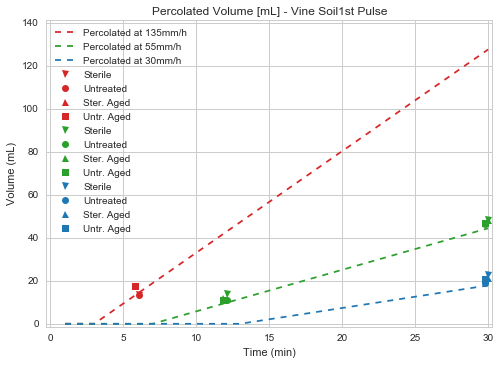

In [11]:
extract_and_plothydro(
    water_data,
    "Percolated at 135mm/h", "Percolated at 55mm/h", "Percolated at 30mm/h", "NA",
    title,
    soil,
    isFirstCycle = True,
    isPercolation = True
)

In [12]:
hydro1 = extract(
    water_data, 
    isFirstCycle = True
)

percol_data1 = hydro1[0]
runoff_data1 = hydro1[1]
time_sizes1 = hydro1[2]

## Transport - 1st pulse

### Computation transport - 1st pulse

#### Test factor X (Sterile)

In [13]:
x = 2

In [14]:
pest_sterile_1st = pest_linear_x(
    Kd_pest_sterile,
    x,
    pest_dict_S_1st,          
    pb_i1, pb_f1,
    percol_data1, runoff_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    isFirstCycle = True,
    isLiving = False,
    KFILM = True)

output_pesti_params = extract_goodness_pest(
        pest_sterile_1st,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = True)

1st Pulse
--------------------------------------------
Koc tested:  [ 369.  300.  250.  225.  200.  150.  125.  100.   75.   50.   30.]
Best log Kd (Fresh):  0.7883239536704223 cm3/g ( Num:  2 ) 
 x factor:  2 
 R2:  -6.34505465013 
 Effective Koc (fresh) - [cm3/g]: 150.0
--------------------------------------------
Best log Kd (Aged):  0.1862639623424599 cm3/g ( Num:  9 ) 
 x factor: No factor considered.  
 R2:  0.500632063009 
 Effective Koc (aged) [cm3/g]: 75.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -64.3592000876 | 52.9265878699 | 148.5
(A) 135 mm/h - Aged  -32.2716018869 | 75.5171638962 | 111.5
(B) 55 mm/h - Fresh  -66.2814300426 | 53.9834305018 | 160.1
(B) 55 mm/h - Aged  -30.5499769733 | 76.8811754906 | 110.7
(C) 55 mm/h - Fresh  47.955002283 | 278.599269299 | 188.3
(C) 55 mm/h - Aged  -1.5

#### Test factor X (Living)

In [15]:
x = 2

In [16]:
pest_living_1st = pest_linear_x(
    Kd_pest_living,
    x,
    pest_dict_L_1st,          
    pb_i1, pb_f1,
    percol_data1, percol_data1,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil,
    KFILM = True,
    isFirstCycle = True,
    isLiving = True)


output_pesti_params = extract_goodness_pest(
        pest_living_1st,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = True)

1st Pulse
--------------------------------------------
Koc tested:  [ 369.  300.  250.  225.  200.  150.  125.  100.   75.   50.   30.]
Best log Kd (Fresh):  0.5824781320284093 cm3/g ( Num:  4 ) 
 x factor:  2 
 R2:  -1.44461997433 
 Effective Koc (fresh) - [cm3/g]: 112.5
--------------------------------------------
Best log Kd (Aged):  0.531325609581028 cm3/g ( Num:  5 ) 
 x factor: No factor considered.  
 R2:  0.887942958516 
 Effective Koc (aged) [cm3/g]: 200.0
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  -39.4875795189 | 67.6528860979 | 111.8
(A) 135 mm/h - Aged  -22.01853484 | 29.0091050395 | 37.2
(B) 55 mm/h - Fresh  -38.7032051151 | 68.2233327069 | 111.3
(B) 55 mm/h - Aged  -63.0658258584 | 29.2888000942 | 79.3
(C) 55 mm/h - Fresh  -15.9871524024 | 233.891767712 | 278.4
(C) 55 mm/h - Aged  -0.936

#### Time series

In [17]:
data_stack = pest_sterile_1st['Data_stack']
sterile1 = extract_pest(data_stack)

mass_percol_sterile1 = sterile1[0]
mass_pond_sterile1 = sterile1[1]

In [18]:
data_stack = pest_living_1st['Data_stack']
living1 = extract_pest(data_stack)

mass_percol_living1 = living1[0]
mass_pond_living1 = living1[1]

## Plotting transport

### Sterile (1st Pulse)

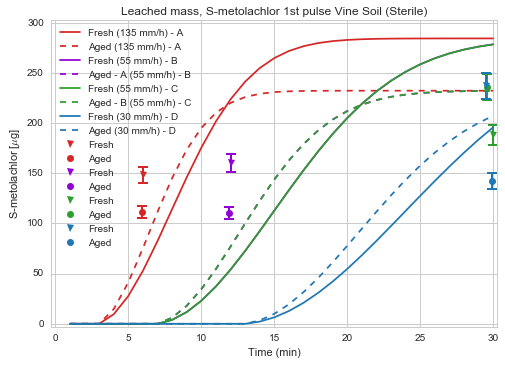

In [19]:
pestiplot_condition(
    mass_percol_sterile1,
    pest_dict_S_1st,
    pesticide,
    soil_type,
    cycle = '1st pulse',
    LEACH = True,
    STERILE = True
)

### Living (1st Pulse, Crop Soil)

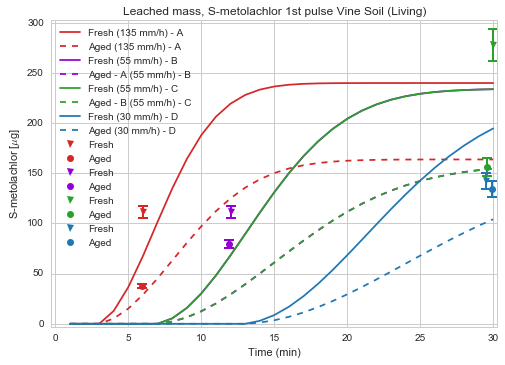

In [20]:
pestiplot_condition(
    mass_percol_living1,
    pest_dict_L_1st,
    pesticide,
    soil_type,
    cycle = '1st pulse',
    LEACH = True,
    STERILE = False
)

# Hydrology - 2nd pulse

### Inverse Ksat determination 

Based on hisotric rainfall pattern, fresh and aged.

In [21]:
water2_ktest = leachsim3(
    soil,
    kSat = [ kSat/5, kSat/10, kSat/15,
        kSat/25, kSat/50,  kSat/75, 
        kSat/100, kSat/125, kSat/150, 
        kSat/175, kSat/200, kSat/250,
        kSat/350, kSat/500, kSat/700, kSat/1000],
    soil_height=soil_height2,
    isFirstCycle = False
)

output_hydro_params = extract_goodness(
    water2_ktest,
    output_hydro_params,
    soil_short,
    isFirstCycle = False,
    isAGED = None
)

R2:  0.982305329281
--------------------------------------------
Sterile, Fresh Soil
ksat high:  0.35240000000000005 cm/h | Error % -12.5148211298
ksat med12:  0.01762 cm/h | Error % 175.352945924
ksat med30:  0.01762 cm/h | Error % 411.263931761
ksat low:  0.07048 cm/h | Error % 4.76959385113
--------------------------------------------
Sterile, Aged Soil
ksat high:  0.14096 cm/h | Error % -0.626720468252
ksat med12:  0.35240000000000005 cm/h | Error % -0.702170472638
ksat med30:  1.1746666666666667 cm/h | Error % -5.73433335983
ksat low:  0.7048000000000001 cm/h | Error % 9.70860633442
--------------------------------------------
Living, Fresh Soil
ksat high:  0.01762 cm/h | Error % inf
ksat med12:  0.025171428571428574 cm/h | Error % -13.3753671892
ksat med30:  0.17620000000000002 cm/h | Error % 2.28902480468
ksat low:  0.35240000000000005 cm/h | Error % -9.70964935858
--------------------------------------------
Living, Fresh Aged
ksat high:  0.11746666666666668 cm/h | Error % 2.32

### Percolation - 2nd pulse

In [22]:
title = "Percolated Volume [mL] - " + str(soil_type) +  " 2nd Pulse"

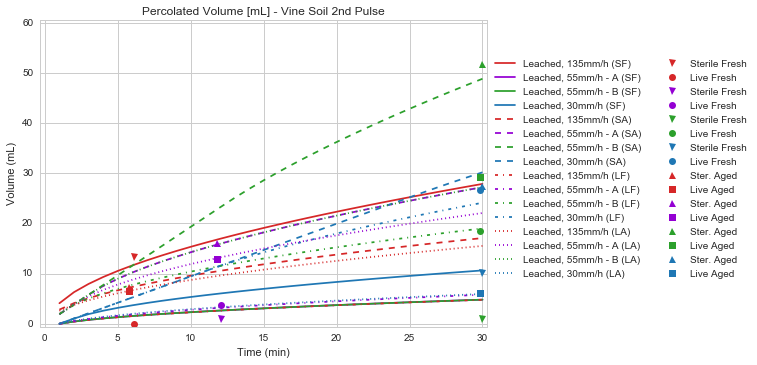

In [23]:
extract_and_plothydro(
    water2_ktest,
    "Leached, 135mm/h", "Leached, 55mm/h - A", "Leached, 55mm/h - B", "Leached, 30mm/h",
    title,
    soil,
    isFirstCycle = False,
    isPercolation = True
)

### Ponding - 2nd pulse

In [24]:
title = "Ponded Volume [mL] [mL] - " + str(soil_type) +  " 2nd Pulse"

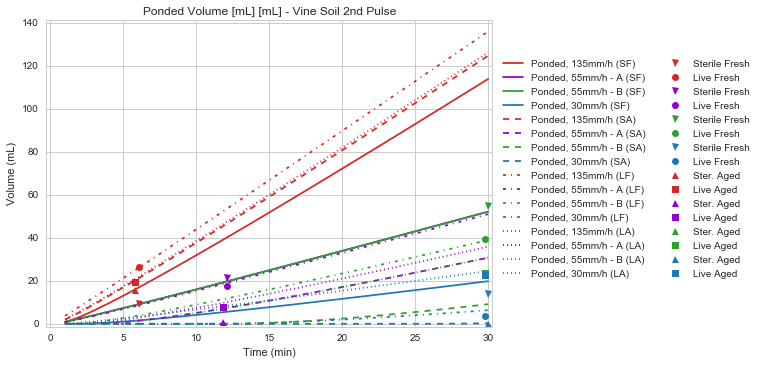

In [25]:
extract_and_plothydro(
    water2_ktest,
    "Ponded, 135mm/h", "Ponded, 55mm/h - A", "Ponded, 55mm/h - B", "Ponded, 30mm/h",
    title,
    soil,
    isFirstCycle = False,
    isPercolation = False
)

In [26]:
hydro2 = extract(
    water2_ktest,
    isFirstCycle = False
)
percol_data2 = hydro2[0]
runoff_data2 = hydro2[1]
time_sizes2 = hydro2[2]

## Transport - 2nd pulse

### Computation transport - 2nd Pulse

#### Kd optimal (sterile)

In [27]:
x = 2

In [28]:
pest_sterile_2nd = pest_linear_x(
    Kd_pest_sterile,
    x,
    pest_dict_S_2nd,
    pb_i2, pb_f2,
    percol_data2, runoff_data2,
    time_sizes2,
    area, soil_height2,
    d, runoff_vel,
    soil = "Alteck",
    isFirstCycle = False,
    isLiving = False)

output_pesti_params = extract_goodness_pest(
        pest_sterile_2nd,
        output_pesti_params,
        soil_short,
        isLiving = False,
        isFirstCycle = False)

2nd Pulse
Sterile
--------------------------------------------
Koc tested:  [ 336.58139535  273.64341085  228.03617571  205.23255814  182.42894057
  136.82170543  114.01808786   91.21447028   68.41085271   45.60723514
   27.36434109]
Best log Kd (Fresh):  0.8782290651098202 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  0.187332910107 
 Effective Koc (fresh) - [cm3/g]: 168.290697674
--------------------------------------------
Best log Kd (Aged):  0.4872939580064411 cm3/g ( Num:  6 ) 
 x factor: No factor considered.  
 R2:  0.874047646075 
 Effective Koc (aged) [cm3/g]: 136.821705426
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  No obs | < LD  | 44.7024121139 | nan
(A) 135 mm/h - Aged  -40.5115455241 | 17.3111402525 | 29.1
(B) 55 mm/h - Fresh  No obs | < LD  | 16.8987136581 | nan
(B) 55 mm/h - Aged  19.20975859

#### Kd optimal (living)

In [29]:
x = 2

In [30]:
pest_living_2nd = pest_linear_x(
    Kd_pest_living,
    x,
    pest_dict_L_2nd,          
    pb_i1, pb_f1,
    percol_data2, runoff_data2,
    time_sizes1,
    area, soil_height1, 
    d, runoff_vel,
    soil = "Alteck",
    KFILM = True,
    isFirstCycle = False,
    isLiving = True)

output_pesti_params = extract_goodness_pest(
        pest_living_2nd,
        output_pesti_params,
        soil_short,
        isLiving = True,
        isFirstCycle = False)

2nd Pulse
Living
--------------------------------------------
Koc tested:  [ 196.21960073  159.52813067  132.94010889  119.646098    106.35208711
   79.76406534   66.47005445   53.17604356   39.88203267   26.58802178
   15.95281307]
Best log Kd (Fresh):  0.7973219800761072 cm3/g ( Num:  1 ) 
 x factor:  2 
 R2:  0.692258941723 
 Effective Koc (fresh) - [cm3/g]: 98.109800363
--------------------------------------------
Best log Kd (Aged):  0.7973219800761072 cm3/g ( Num:  1 ) 
 x factor: No factor considered.  
 R2:  0.642876923593 
 Effective Koc (aged) [cm3/g]: 196.219600726
--------------------------------------------
--------------------------------------------
Scenario - modality - Predicted error prcnt (%) | Predicted | Observed |
--------------------------------------------
(A) 135 mm/h - Fresh  No obs | < LD  | 5.28506909745 | nan
(A) 135 mm/h - Aged  -54.8407308024 | 7.27064234081 | 16.1
(B) 55 mm/h - Fresh  No obs | < LD  | 16.0697996967 | nan
(B) 55 mm/h - Aged  -15.771460605

#### Time series

In [31]:
data_stack = pest_sterile_2nd['Data_stack']
sterile2 = extract_pest(data_stack)

data_stack = pest_living_2nd['Data_stack']
living2 = extract_pest(data_stack)

mass_percol_sterile2 = sterile2[0]
mass_pond_sterile2 = sterile2[1]

mass_percol_living2 = living2[0]
mass_pond_living2 = living2[1]

## Plotting transport 

### Sterile (2nd Pulse)

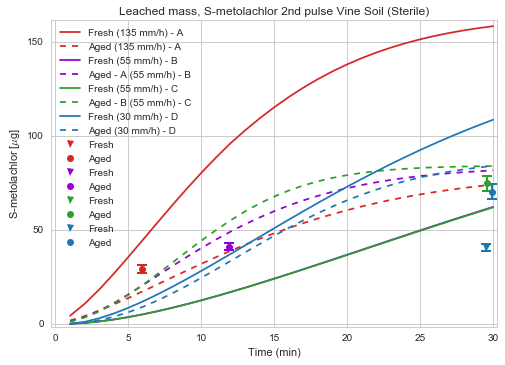

In [32]:
pestiplot_condition(
    mass_percol_sterile2,
    pest_dict_S_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = True
)

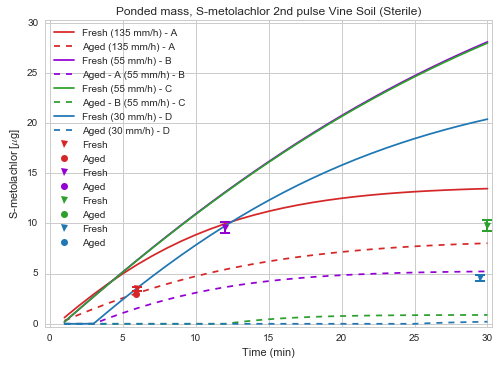

In [33]:
pestiplot_condition(
    mass_pond_sterile2,
    pest_dict_S_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = True
)

### Living (2nd Pulse)

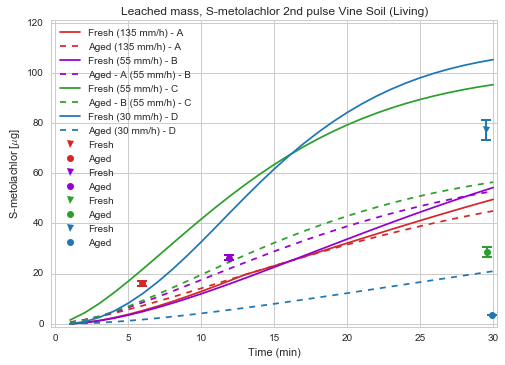

In [34]:
pestiplot_condition(
    mass_percol_living2,
    pest_dict_L_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = True,
    STERILE = False
)

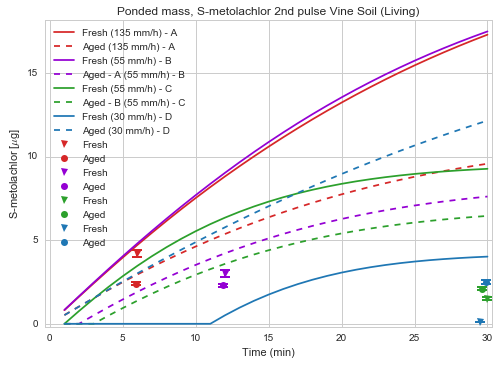

In [35]:
pestiplot_condition(
    mass_pond_living2,
    pest_dict_L_2nd,
    pesticide,
    soil_type,
    cycle = '2nd pulse',
    LEACH = False,
    STERILE = False
)

In [36]:
import pprint

In [37]:
pprint.pprint(output_hydro_params)

{'Vine': [{'Err1': [{'Aged': [-9.9497695760673803,
                              -19.863856215843292,
                              -4.3503947697446481,
                              -15.643875894555064],
                     'Fresh': [-1.6576800420983793,
                               29.76210753442875,
                               0.19339757059332816,
                               -4.4427680131527749]}],
           'Err2': [{'LA': [2.3250655288884485,
                            1.775964240154662,
                            -6.8151479703231335,
                            -4.0853015171098992],
                     'LF': [inf,
                            -13.375367189230481,
                            2.2890248046824371,
                            -9.7096493585817267],
                     'SA': [-0.62672046825181538,
                            -0.70217047263768517,
                            -5.7343333598281507,
                            9.7086063344151547],
              

In [38]:
pprint.pprint(output_pesti_params)

{'Vine': {'Err1': {'LA': [-22.018534839976688,
                          -63.065825858449763,
                          -0.93682005133621238,
                          -22.608063875273899],
                   'LF': [-39.487579518859114,
                          -38.703205115065792,
                          -15.987152402435811,
                          37.143724005649943],
                   'SA': [-32.271601886853205,
                          -30.549976973262083,
                          -1.5019869254917209,
                          45.189579803131771],
                   'SF': [-64.359200087636694,
                          -66.281430042584262,
                          47.955002282995217,
                          -17.48506959648903]},
          'Err2': {'LA': [-54.840730802421803,
                          -15.771460605135271,
                          98.17748679672637,
                          516.58844166427457],
                   'LF': ['No obs | < LD ',
                

END NOTEBOOK